In [19]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
df = pd.read_csv('video_games.csv')

In [21]:
df.info()
df['user_score'] = df['user_score'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       7590 non-null   float64
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [22]:
df['publisher'].value_counts(normalize=True) #százalékos

publisher
Electronic Arts                 0.081368
Activision                      0.059106
Namco Bandai Games              0.056346
Ubisoft                         0.055986
Konami Digital Entertainment    0.050045
                                  ...   
Valve                           0.000060
ITT Family Games                0.000060
Elite                           0.000060
Evolution Games                 0.000060
Red Flagship                    0.000060
Name: proportion, Length: 581, dtype: float64

In [23]:
corr = df.select_dtypes(include=['number']).corr()
corr

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
year_of_release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.267851,0.175339
na_sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.086200,0.246429
eu_sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.055337,0.283360
jp_sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.125598,0.075638
other_sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.057119,0.238982
global_sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.088139,0.265012
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
critic_count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
user_count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


<Axes: xlabel='critic_score', ylabel='global_sales'>

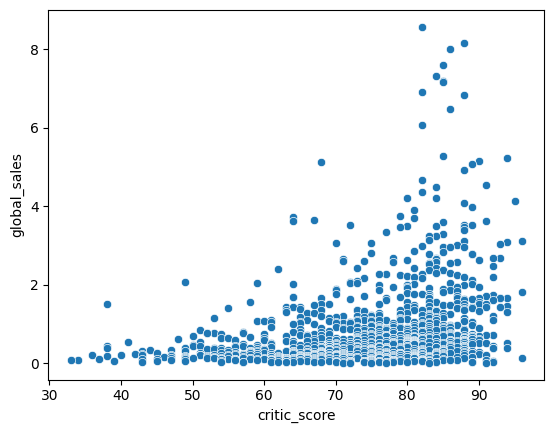

In [55]:
df1 = df[(df['publisher']=='Electronic Arts')]
sns.scatterplot(x=df1['critic_score'],y=df1['global_sales'])

In [56]:
df1 = df1.dropna(subset=['global_sales','critic_score'])

In [66]:
X = df1[['eu_sales']].to_numpy()
y = df1['global_sales'].to_numpy()
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression()

<Axes: xlabel='eu_sales', ylabel='global_sales'>

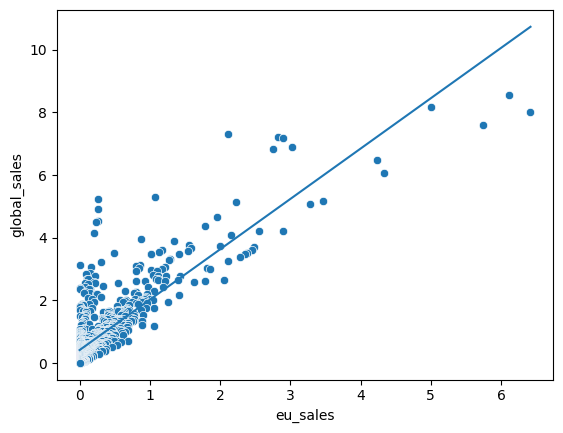

In [72]:
theta0 = reg2.intercept_
theta1 = reg2.coef_[0]

h = theta0 + theta1 * df1['eu_sales']
sns.scatterplot(x=df1['eu_sales'],y=df1['global_sales'])
sns.lineplot(x=df1['eu_sales'], y=h)

In [73]:
# Előrejelzés az X adatokra
y_pred = reg2.predict(X)

# Kiértékelés
mse = mean_squared_error(y, y_pred)
r2 = r2_score(df1['global_sales'], y_pred)

# Eredmények kiírása
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.3756785422857345
R-squared (R²): 0.7032125169996473


In [74]:
df1['global_sales'].mean()

0.8854130223517978